In [1]:
import jax.numpy as jnp
import numpy as np
from scipy import special
from scipy import stats
import numpyro
from numpyro.infer import MCMC, NUTS, Predictive
import numpyro.distributions as dist
from numpyro.contrib.control_flow import scan, cond
from jax import random
from jax import nn
import jax
import arviz as az
from matplotlib import pyplot as plt
import pandas as pd
az.rcParams["plot.max_subplots"] = 200
plt.rc('font', size=22, family='arial') 
plt.rc('axes', linewidth=1.5)
plt.rc('xtick.major', width=1.5, size=6)
plt.rc('ytick.major', width=1.5, size=6)

from matplotlib import pyplot as plt

import os
import pickle
import setup

import seaborn as sns
from rl_models import *

from utils import plot_mean_hpdi, nanmovmean

key = random.PRNGKey(0)

# RL model comparison

In [2]:
processed_data_dir = "../data/Processed"
processed_file_name = "processed"
# processed_file_name = "excluded"
figure_data_dir = "/Users/f005d7d/Documents/Attn_MdPRL/Py-attention-project-analysis/figures/All Processed"

with open(os.path.join(processed_data_dir, processed_file_name), "rb") as f:
        data = pickle.load(f)
stims, stimsF0, stimsF1, full_rwd, choices, valid_mask = make_batch(data)

with open(os.path.join(processed_data_dir, "mcmc_first_half"), 'rb') as f:
    all_models_mcmc = pickle.load(f)

compare_dict = {}

for k, v in all_models_mcmc.items():
    inf_data = az.from_numpyro(v)
    log_lik = inf_data.log_likelihood
    log_lik['choice_total'] = log_lik.sum('choice_dim_0').to_array()
    compare_dict[k] = az.waic(inf_data, var_name='choice_total', pointwise=True)


print('loaded all models')
print('starting model comparisons')
comp_df = az.compare(compare_dict, ic='waic')
print(comp_df)


/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python

loaded all models
starting model comparisons
       rank    elpd_waic      p_waic  elpd_diff        weight         se  \
F_AL      0 -2125.444623  136.165222   0.000000  6.175718e-01  52.411740   
F_ACL     1 -2127.440843  142.013184   1.996220  2.734201e-01  52.160416   
F_AC      2 -2140.598375  130.783707  15.153753  0.000000e+00  52.114361   
F_UA      3 -2152.068360   75.267159  26.623738  1.090080e-01  48.894459   
O         4 -2222.258531   69.877693  96.813908  1.002975e-12  44.477235   

             dse  warning scale  
F_AL    0.000000     True   log  
F_ACL   2.711263     True   log  
F_AC    6.017678     True   log  
F_UA    9.146806     True   log  
O      15.807764     True   log  


/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:1648: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/f005d7d/opt/miniconda3/envs/hbi/lib/python3.12/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'log' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (


In [3]:
az.summary(az.from_numpyro(all_models_mcmc['F_AL']), var_names=['mu', 'sigma'], stat_focus='median', hdi_prob=0.95)

,median,mad,eti_2.5%,eti_97.5%,mcse_median,ess_median,ess_tail,r_hat
mu[0],-0.026,0.027,-0.104,0.053,0.001,10420.955,6080.0,1.0
mu[1],1.333,0.091,1.069,1.601,0.004,1874.643,2748.0,1.0
mu[2],-1.475,0.164,-2.051,-1.049,0.005,3082.788,3899.0,1.0
mu[3],-1.934,0.228,-2.895,-1.445,0.008,4070.467,4439.0,1.0
mu[4],-1.581,0.217,-2.398,-0.998,0.006,3159.861,3199.0,1.0
mu[5],-2.769,0.281,-3.797,-2.123,0.006,6496.838,4745.0,1.0
mu[6],-2.252,0.254,-3.274,-1.711,0.006,5228.195,4646.0,1.0
mu[7],-0.946,0.112,-1.275,-0.626,0.004,3159.244,4762.0,1.0
mu[8],-2.855,0.277,-3.883,-2.193,0.006,7383.603,4595.0,1.0
mu[9],-1.827,0.218,-2.700,-1.273,0.007,2848.142,3228.0,1.0


<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/var/folders/vn/04h3k2gd41v70zhrqdwyg9cw0000gp/T/ipykernel_13950/2020790501.py:15: SyntaxWarning: invalid escape sequence '\D'
  axes.set_ylabel('$\Delta$ WAIC')


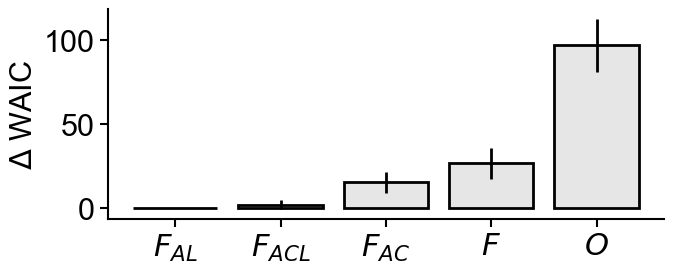

In [4]:
label_mapper = {
    'F_ACL': f'$F_{{ACL}}$',
    'F_AC': f'$F_{{AC}}$',
    'F_AL': f'$F_{{AL}}$',
    'F_UA': f'$F$',
    'O': f'$O$',
}

fig, axes = plt.subplots(figsize=(7.2,3.2))

axes.bar(np.arange(comp_df.shape[0]), comp_df.loc[:,'elpd_diff'], 
         edgecolor='black', facecolor=[0.9,0.9,0.9], yerr=comp_df.loc[:,'dse'],
         lw=2, error_kw = {'elinewidth': 2})
axes.set_xticks(np.arange(comp_df.shape[0]), [label_mapper[name] for name in comp_df.index.values])
axes.set_ylabel('$\Delta$ WAIC')
sns.despine()
fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "rl_model_comparison_first_half.pdf"))


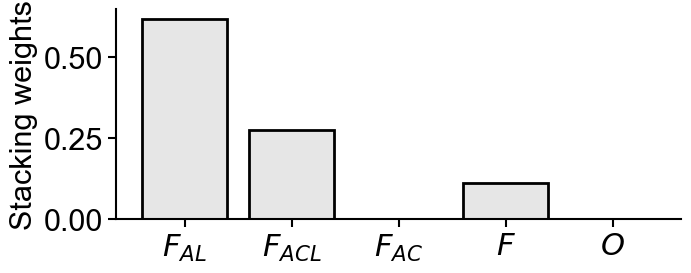

In [5]:
fig, axes = plt.subplots(figsize=(7.2,3.2))

axes.bar(np.arange(comp_df.shape[0]), comp_df.loc[:,'weight'], edgecolor='black', facecolor=[0.9,0.9,0.9], lw=2)
axes.set_xticks(np.arange(comp_df.shape[0]), [label_mapper[name] for name in comp_df.index.values])
axes.set_ylabel('Stacking weights')

sns.despine()
fig.tight_layout()
plt.savefig(os.path.join(figure_data_dir, "rl_weights_first_half.pdf"))


# RL parameter estimations

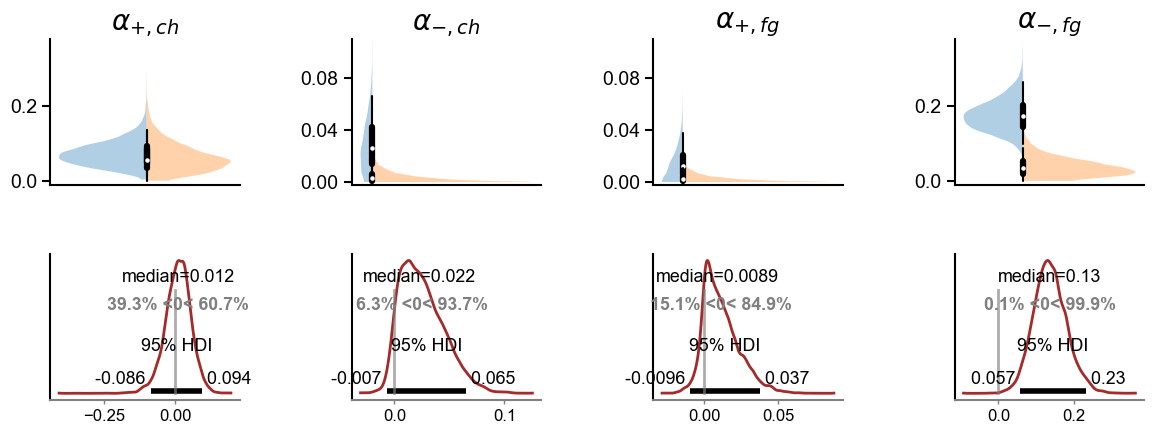

In [6]:
fig, axes = plt.subplots(2,4,figsize=(12,4.8))

inf_data = az.from_numpyro(all_models_mcmc['F_AL'])
post = inf_data.posterior

lr_start = 2

post['alpha+_c,0'] = special.ndtr(post['mu'][...,lr_start])
post['alpha+_c,1'] = special.ndtr(post['mu'][...,lr_start+2])
post['alpha-_c,0'] = special.ndtr(post['mu'][...,lr_start+1])
post['alpha-_c,1'] = special.ndtr(post['mu'][...,lr_start+3])

post['alpha+_f,0'] = special.ndtr(post['mu'][...,lr_start+4])
post['alpha+_f,1'] = special.ndtr(post['mu'][...,lr_start+6])
post['alpha-_f,0'] = special.ndtr(post['mu'][...,lr_start+5])
post['alpha-_f,1'] = special.ndtr(post['mu'][...,lr_start+7])


az.plot_violin(
    inf_data,
    var_names=['alpha+_c,0', 'alpha-_c,0', 
                'alpha+_f,0', 'alpha-_f,0'],
    side="left",
    ax=axes[0],
    hdi_prob=0.95,
    sharey=True,
)
az.plot_violin(
    inf_data,
    var_names=['alpha+_c,1', 'alpha-_c,1', 
                'alpha+_f,1', 'alpha-_f,1'],
    side="right",
    ax=axes[0],
    hdi_prob=0.95,
    sharey=True,
)

axes[0,0].set_title(r'$\alpha_{+, ch}$', fontsize=20)
axes[0,1].set_title(r'$\alpha_{-, ch}$', fontsize=20)
axes[0,2].set_title(r'$\alpha_{+, fg}$', fontsize=20)
axes[0,3].set_title(r'$\alpha_{-, fg}$', fontsize=20)

for a in axes[0]:
    a.tick_params(left=True)

axes[0,0].set_ylim(-0.01, 0.38)
axes[0,3].set_ylim(-0.01, 0.38)
axes[0,0].set_yticks(np.arange(0,0.38,0.2))
axes[0,3].set_yticks(np.arange(0,0.38,0.2))

axes[0,1].set_ylim(-0.002, 0.11)
axes[0,2].set_ylim(-0.002, 0.11)
axes[0,1].set_yticks(np.arange(0,0.11,0.04))
axes[0,2].set_yticks(np.arange(0,0.11,0.04))


# post['diff_beta'] = np.exp(post['mu'][...,1])-np.exp(post['mu'][...,2])
post['diff_ch_r'] = (special.ndtr(post['mu'][...,lr_start])-special.ndtr(post['mu'][...,lr_start+2]))
post['diff_ch_nr'] = (special.ndtr(post['mu'][...,lr_start+1])-special.ndtr(post['mu'][...,lr_start+3]))
post['diff_fg_r'] = (special.ndtr(post['mu'][...,lr_start+4])-special.ndtr(post['mu'][...,lr_start+6]))
post['diff_fg_nr'] = (special.ndtr(post['mu'][...,lr_start+5])-special.ndtr(post['mu'][...,lr_start+7]))
# post['diff_decay'] = special.ndtr(post['mu'][...,11])-special.ndtr(post['mu'][...,12])

pp = az.plot_posterior(inf_data, var_names=['diff_ch_r', 'diff_ch_nr', 'diff_fg_r', 'diff_fg_nr'], color='brown',
                    point_estimate='median', hdi_prob=0.95, ref_val=0, ref_val_color='grey', ax=axes[1], textsize=12, lw=2)

for a in axes[1]:
    a.set_title('')

# axes[1,0].set_title(r'$\alpha_{+, chosen}$')
# axes[1,1].set_title(r'$\alpha_{-, chosen}$')
# axes[1,2].set_title(r'$\alpha_{+, forgone}$')
# axes[1,3].set_title(r'$\alpha_{-, forgone}$')

sns.despine()
plt.tight_layout(h_pad=2, w_pad=2)
plt.savefig(os.path.join(figure_data_dir, "rl_param_forest_first_half.pdf"))
